In [22]:
import os 
import tarfile
import requests

import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd

DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml/blob/master/" 
HOUSING_PATH = os.path.join("datasets", "housing") 
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz?raw=true"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    if not os.path.isdir(housing_path): 
        os.makedirs(housing_path) 
    tgz_path = os.path.join(housing_path, "housing.tgz")
    #urllib.retrieve(housing_url, tgz_path)
    #urllib2.urlopen(housing_url)  
    r = requests.get(housing_url)
    with open('./datasets/housing/housing.tgz', 'wb') as f:  
        f.write(r.content)

        
    housing_tgz = tarfile.open(tgz_path) 
    housing_tgz.extractall(path=housing_path) 
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv") 
    return pd.read_csv(csv_path)

In [23]:
fetch_housing_data()
data = load_housing_data()
prices = data["median_house_value"]
features = data.drop(["median_house_value", "ocean_proximity"], axis = 1)
features.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


## Data Statistics

In [24]:
prices.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

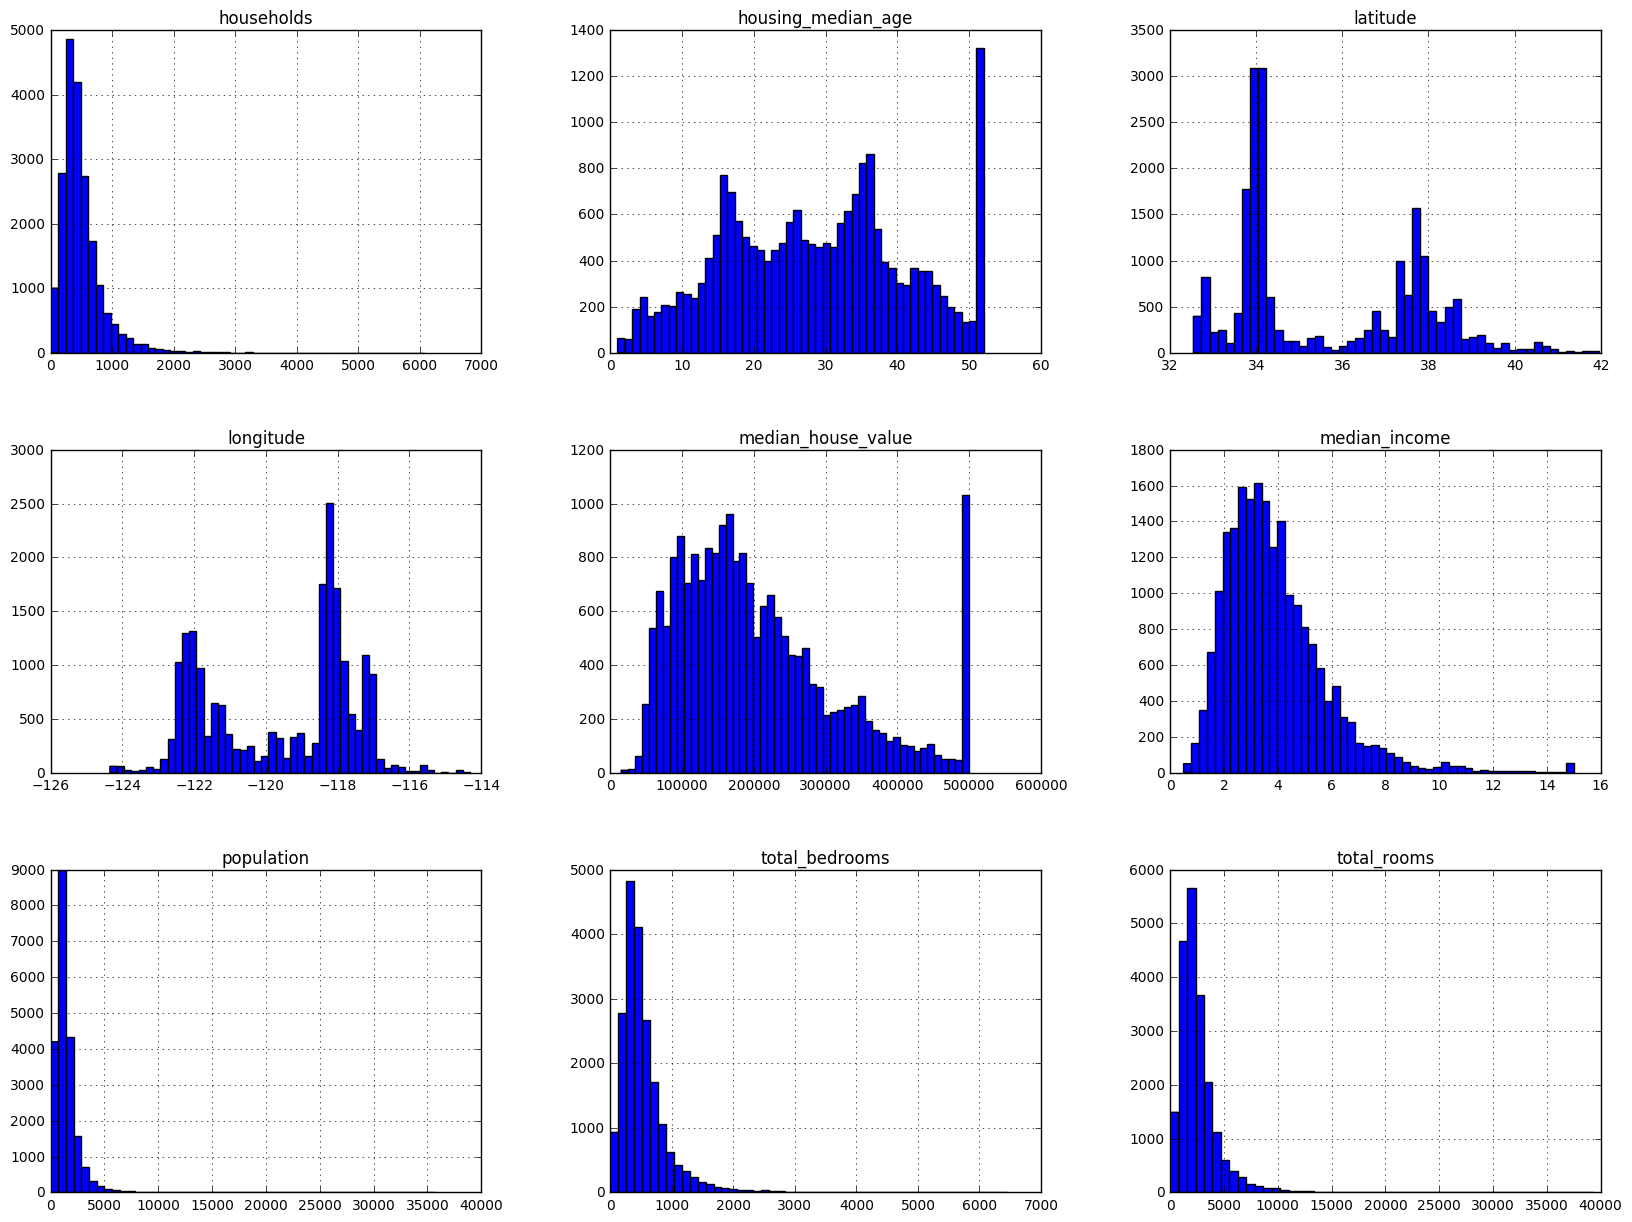

In [29]:

data.hist(bins=50 ,figsize=( 20,15 )) 
plt.show()

### Test Set

In [30]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=984503745)

# Success
print "Training and testing split was successful."

Training and testing split was successful.
